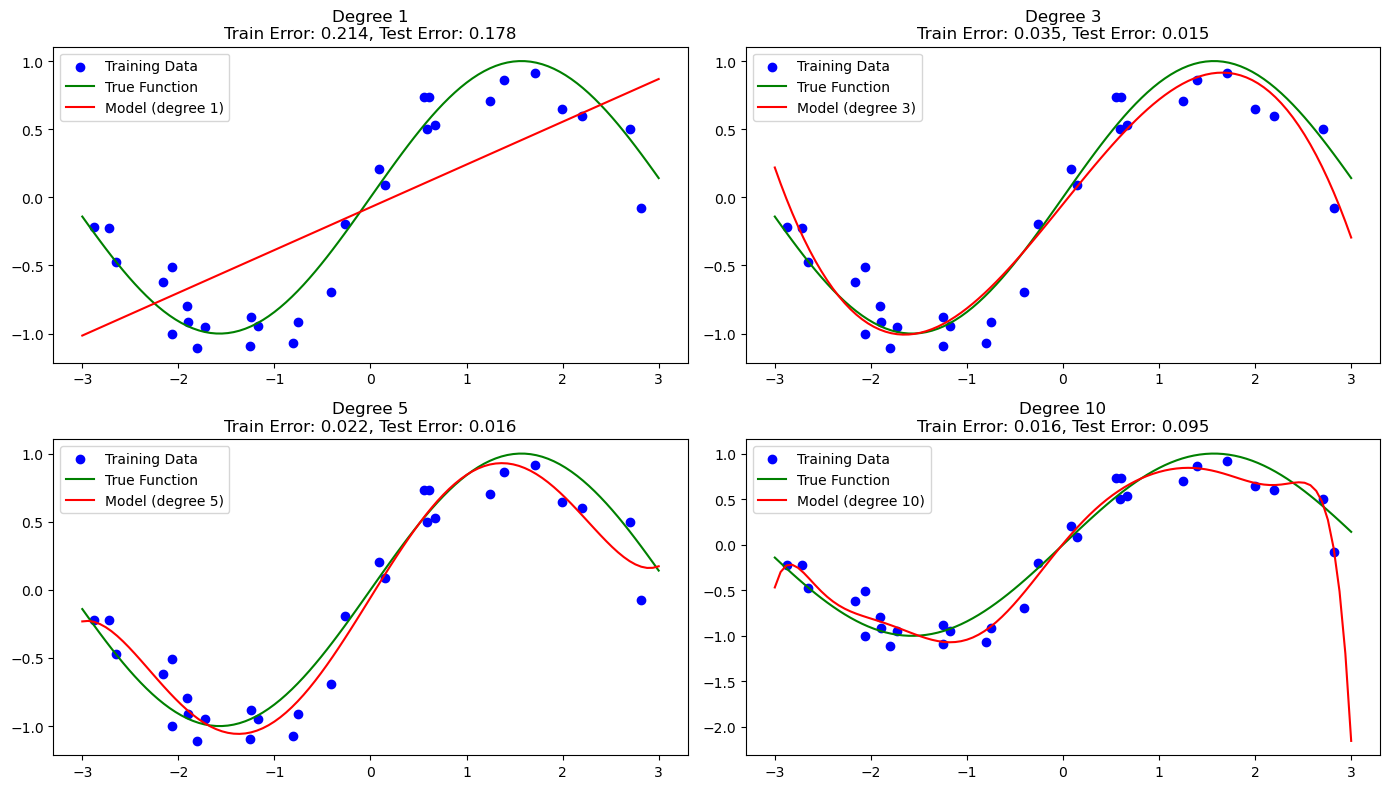

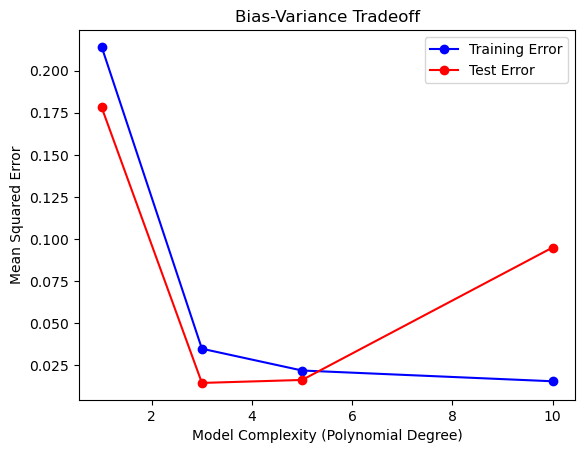

In [1]:
# Bias-Variance Tradeoff Analysis
# This notebook demonstrates the bias-variance tradeoff using polynomial regression.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Generate synthetic data
def generate_data(n_samples=30, noise=0.2, random_seed=42):
    np.random.seed(random_seed)
    X = np.random.uniform(-3, 3, size=n_samples).reshape(-1, 1)
    y = np.sin(X).ravel() + np.random.normal(scale=noise, size=n_samples)
    return X, y

# Create true function for comparison
def true_function(X):
    return np.sin(X)

# Generate data
X, y = generate_data()
X_test = np.linspace(-3, 3, 100).reshape(-1, 1)
y_true = true_function(X_test)

# Visualize bias-variance tradeoff
def plot_bias_variance_tradeoff():
    degrees = [1, 3, 5, 10]
    train_errors = []
    test_errors = []

    plt.figure(figsize=(14, 8))

    for i, degree in enumerate(degrees):
        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        model.fit(X, y)

        # Predictions
        y_pred_train = model.predict(X)
        y_pred_test = model.predict(X_test)

        # Calculate errors
        train_error = mean_squared_error(y, y_pred_train)
        test_error = mean_squared_error(y_true, y_pred_test)
        train_errors.append(train_error)
        test_errors.append(test_error)

        # Plot the model's predictions
        plt.subplot(2, 2, i + 1)
        plt.scatter(X, y, color='blue', label='Training Data')
        plt.plot(X_test, y_true, label='True Function', color='green')
        plt.plot(X_test, y_pred_test, label=f'Model (degree {degree})', color='red')
        plt.title(f"Degree {degree}\nTrain Error: {train_error:.3f}, Test Error: {test_error:.3f}")
        plt.legend()

    plt.tight_layout()
    plt.figure()

    # Plot training and test errors
    plt.plot(degrees, train_errors, label='Training Error', marker='o', color='blue')
    plt.plot(degrees, test_errors, label='Test Error', marker='o', color='red')
    plt.xlabel('Model Complexity (Polynomial Degree)')
    plt.ylabel('Mean Squared Error')
    plt.title('Bias-Variance Tradeoff')
    plt.legend()
    plt.show()

# Run the visualization
plot_bias_variance_tradeoff()
